In [1]:
import pandas as pd
file_path = "meme_table.csv"
meme_df = pd.read_csv(file_path)
meme_df.head()

/Users/yingrongmao/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,meme_id,cluster,created_utc,title,selftext,author,num_comments,score,extracted_text,comments_text,created_date
0,cawlo8,cluster_4,1.562651e+09,"I have an MIDI keyboard, just no plug for it ):",NaN,YTMusicXD,0,3,When you want to easily make midi; limited pow...,NaN,2019-07-09
1,d72m1n,cluster_4,1.569021e+09,R.I.P,NaN,masnargom,0,95,When Imina room full of antivax children and f...,NaN,2019-09-20
2,bo6k2s,cluster_4,1.557769e+09,It's like a life hack,NaN,emanuelegay,2,4,Connect one Power Bank to another one Unlimite...,This is just plug in a power strip to itself\n...,2019-05-13
3,cr40bc,cluster_4,1.565948e+09,I Finally Have Unlimited Power,NaN,Zaxoosh,0,64,When you finally get enough karma to post on r...,NaN,2019-08-16
4,apoel0,cluster_4,1.549939e+09,Crrevt,NaN,memeboiiii7059,0,7,whwn yoy make a meme wirh one hand Unlimited p...,NaN,2019-02-12


In [61]:
import json
import pandas as pd
from datetime import datetime

# Load data
file_path = "time_unit_meme.json"
with open(file_path, 'r') as json_file:
    data = json.load(json_file)

# Create DataFrame
all_posts_df = pd.DataFrame(data.items(), columns=['nth month', 'Value'])

# Define the start date
start_date = pd.Timestamp('2008-12-01')

# Calculate dates correctly
all_posts_df['Date'] = all_posts_df['nth month'].apply(lambda x: start_date + pd.DateOffset(months=int(x)))

# Format the dates
all_posts_df['Date'] = pd.to_datetime(all_posts_df['Date']) + pd.offsets.MonthEnd(0) # Format as 'YYYY-MM-DD'

In [68]:
all_posts_df["created_date"] = pd.to_datetime(all_posts_df["Date"])
all_posts_df.set_index('created_date', inplace=True)

In [67]:
all_posts_df.head()

,nth month,Value,Date
created_date,,,
2008-12-31,0,3,2008-12-31
2009-01-31,1,1,2009-01-31
2009-02-28,2,0,2009-02-28
2009-03-31,3,0,2009-03-31
2009-04-30,4,0,2009-04-30


In [52]:
cluster_to_analyze = "cluster_175"  # Replace with the cluster you want to analyze
cluster_df = meme_df[meme_df["cluster"] == cluster_to_analyze]
cluster_df['created_date'] = pd.to_datetime(cluster_df['created_date'])
cluster_df.set_index('created_date', inplace=True)
monthly_frequency = cluster_df.resample('M').size()

/var/folders/rg/p_ps2y216432jwhfjvk8nh8m0000gn/T/ipykernel_15897/287681254.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df['created_date'] = pd.to_datetime(cluster_df['created_date'])
/var/folders/rg/p_ps2y216432jwhfjvk8nh8m0000gn/T/ipykernel_15897/287681254.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_frequency = cluster_df.resample('M').size()


In [70]:
aligned_template = monthly_frequency.reindex(all_posts_df.index)

In [74]:
aligned_2 = all_posts_df.reindex(monthly_frequency.index)

In [76]:
aligned_2.head()

,nth month,Value,Date
created_date,,,
2018-02-28,110,1241,2018-02-28
2018-03-31,111,1127,2018-03-31
2018-04-30,112,1155,2018-04-30
2018-05-31,113,1258,2018-05-31
2018-06-30,114,1182,2018-06-30


In [77]:
result = monthly_frequency / aligned_2['Value']

In [78]:
result.head()

created_date
2018-02-28    0.000806
2018-03-31    0.000000
2018-04-30    0.000866
2018-05-31    0.002385
2018-06-30    0.001692
Freq: ME, dtype: float64

In [80]:
a = result.reset_index()
type(a)

pandas.core.frame.DataFrame

In [82]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(a[0])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -4.641790945354079
p-value: 0.000108098872350047


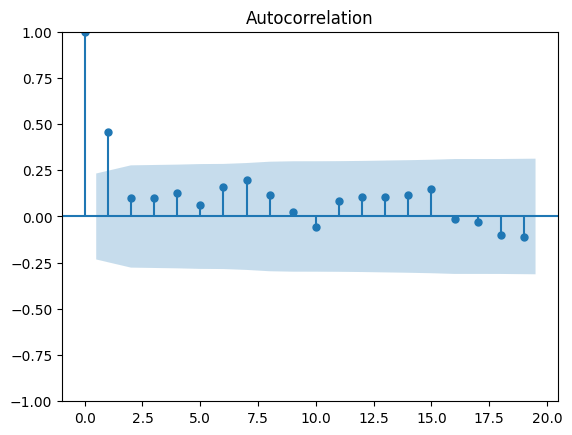

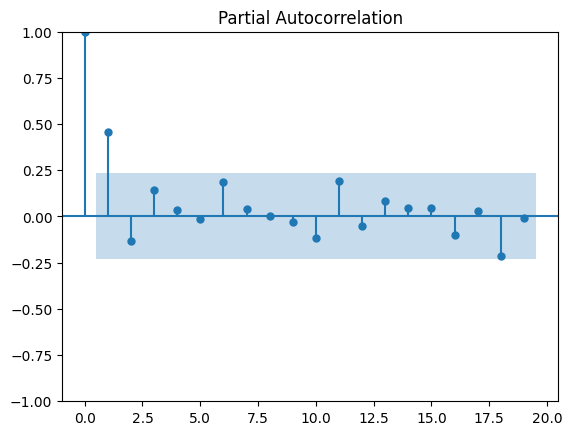

In [83]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plot_acf(a[0])

plot_pacf(a[0])
plt.show()

In [91]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
model = ARIMA(a[0], order=(1, 0, 0))
results = model.fit()

# Print the model summary
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   71
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 440.915
Date:                Fri, 29 Nov 2024   AIC                           -875.830
Time:                        16:36:24   BIC                           -869.042
Sample:                             0   HQIC                          -873.130
                                 - 71                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0013      0.000     11.866      0.000       0.001       0.002
ar.L1          0.4900      0.115      4.264      0.000       0.265       0.715
sigma2      2.306e-07   3.42e-08      6.734      0.0